# Electromiografía: Detección y cuantificación de eventos.
### Flores Oliva Alejandro Elliot
#### Licenciatura en Física Biomédica en Ciencias Biológicas , Facultad de Ciencias, Universidad Nacional Autónoma de México.

## Índice:

[1. Análisis del registro EMG.](#1)

[2. Análisis del registro EMG con filtro mediano.](#3)

[3. Análisis del registro EMG con filtro Butterworth.](#4)

[4. Análisis del registro EMG con filtro Savitzky-Golay.](#5)


# Cuantificación el área bajo la curva y su tiempo en una señal electromiográfica (EMG) con la Enfermedad de Parkinson

El EMG es una técnica utilizada para medir la actividad eléctrica de los músculos, su análisis puede proporcionar sobre la actividad muscular, puede ayudar a cuantificar y caracterizar la actividad muscular en términos de amplitud, duración y sincronización temporal. Estas medidas ayudan a comprender la función muscular, fatiga o diagnosticar trastornos musculares

El **cálculo del área bajo la curva del EMG** proporciona una medida cuantitativa de la cantidad total de actividad eléctrica generada por el músculo en un **tiempo específico**. 

>La intensidad o la amplitud de la señal EMG: permite comparar diferentes actividades musculares, evaluar la fatiga muscular o identificar patrones anormales de activación muscular.

El tiempo de cambio de amplitud en el EMG se refiere al tiempo en el que se produce una **transición significativa en la amplitud de la señal**. Esto puede indicar el inicio o el final de una contracción muscular, así como cambios en la activación muscular durante una contracción, reposo. 

>El tiempo de cambio de amplitud permite analizar la sincronización temporal de la activación muscular, detectar eventos musculares específicos y proporcionar información sobre la coordinación muscular.


##### Librerías utilizadas
Importamos las librerías/ módulos que nos permitirán hacer cálculos, filtrar datos, utilizar filtros, análisis, etc.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy.signal import medfilt
from scipy.signal import butter, filtfilt
from scipy.signal import savgol_filter

In [26]:
# Parámetros de ajuste
start_time = 60  # Tiempo de inicio en segundos
end_time = 120  # Tiempo de fin en segundos
threshold1 = 500  # Umbral para el canal 1
threshold2 = 500  # Umbral para el canal 2

In [27]:
# Cargar el archivo .wav de dos canales
archivo = '../Parkinson Notebooks/1-Registros-EMG/Con medicamento/CM_Registro_FlexorLargo_Relajación.wav'
sample_rate, signal = wav.read(archivo)

# Obtener la duración de la señal en segundos
duration = len(signal) / sample_rate

# Calcular el tiempo en segundos
time = np.linspace(0, duration, len(signal))

# Calcular los índices correspondientes al rango de tiempo de interés
start_index = int(start_time * sample_rate)
end_index = int(end_time * sample_rate)

# Obtener los segmentos de señal dentro del rango de tiempo
segment_signal = signal[start_index:end_index, :]

# Separar los canales de la señal
channel1 = segment_signal[:, 0]
channel2 = segment_signal[:, 1]

<a id='1'></a>
##  Análisis del registro EMG

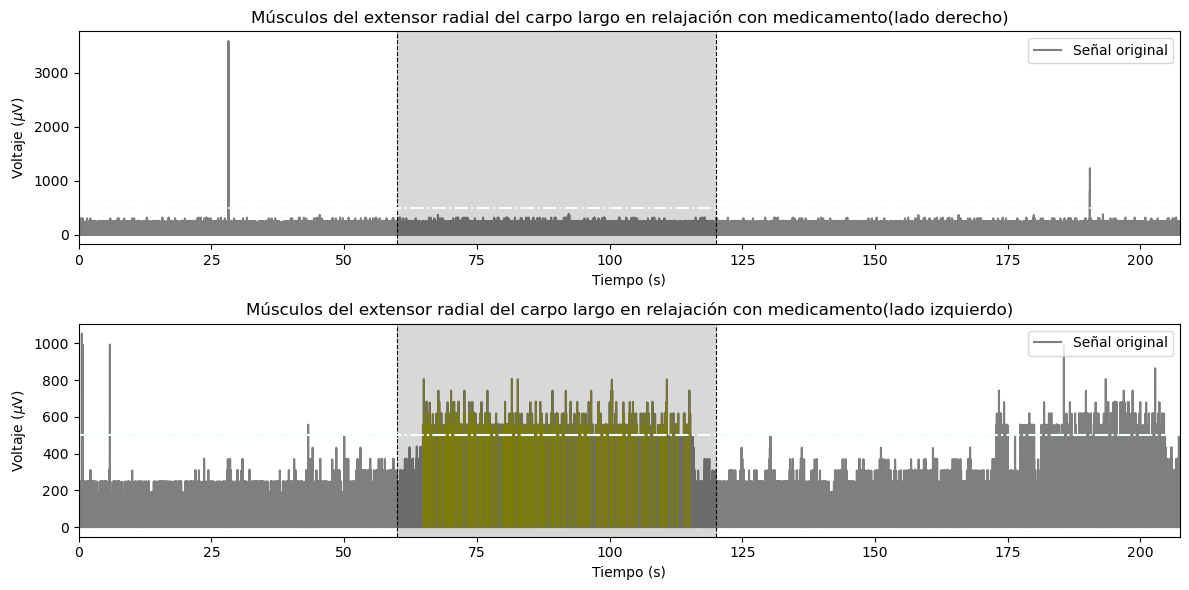

Tiempo de cambio de amplitud del canal 1: 0.0 segundos
Tiempo de cambio de amplitud del canal 2: 0.10650005133780382 segundos
Área bajo la curva de contracción del canal 1: 0.0
Área bajo la curva de contracción del canal 2: 43.9227


In [28]:
# Obtener los valores absolutos positivos de cada canal
abs_channel1 = np.abs(channel1)
abs_channel2 = np.abs(channel2)

# Aplicar umbral a los canales
abs_channel1[abs_channel1 <= threshold1] = 0
abs_channel2[abs_channel2 <= threshold2] = 0

# Calcular el tiempo de cambio de amplitud de los valores absolutos positivos
diff1 = np.diff(abs_channel1)
time_diff1 = np.diff(time[start_index:end_index])
cambio_amplitud_index1 = np.where(diff1 != 0)[0]
tiempo_cambio_amplitud1 = np.sum(time_diff1[cambio_amplitud_index1])

diff2 = np.diff(abs_channel2)
time_diff2 = np.diff(time[start_index:end_index])
cambio_amplitud_index2 = np.where(diff2 != 0)[0]
tiempo_cambio_amplitud2 = np.sum(time_diff2[cambio_amplitud_index2])

# Calcular el área bajo la curva de contracción de los valores absolutos positivos
contraction_area1 = np.trapz(abs_channel1, dx=1/sample_rate)
contraction_area2 = np.trapz(abs_channel2, dx=1/sample_rate)

# Graficar la señal con valores absolutos positivos
plt.figure(figsize=(12, 6))

# Canal 1
plt.subplot(211)
plt.axvspan(start_time, end_time, facecolor='gray', alpha=0.3)
plt.plot(time, np.abs(signal[:, 0]), color='black', label='Señal original', alpha=0.5)
plt.axvline(start_time, color='black', linestyle='--', linewidth=0.8)
plt.axvline(end_time, color='black', linestyle='--', linewidth=0.8)
plt.fill_between(time[start_index:end_index], 0, abs_channel1, where=abs_channel1 > 0, color='yellow', alpha=0.5)
plt.axhline(y=threshold1, color='azure', linestyle='-.')
plt.xlim(0,max(time))
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje ($\mu$V)')
plt.title('Músculos del extensor radial del carpo largo en relajación con medicamento(lado derecho)')
# Crear la leyenda con una ubicación específica
plt.legend(loc='upper right')

# Canal 2
plt.subplot(212)
plt.axvspan(start_time, end_time, facecolor='gray', alpha=0.3)
plt.plot(time, np.abs(signal[:, 1]), color='black', label='Señal original', alpha=0.5)
plt.axvline(start_time, color='black', linestyle='--', linewidth=0.8)
plt.axvline(end_time, color='black', linestyle='--', linewidth=0.8)
plt.fill_between(time[start_index:end_index], 0, abs_channel2, where=abs_channel2 > 0, color='yellow', alpha=0.5)
plt.axhline(y=threshold2, color='azure', linestyle='-.')
plt.xlim(0,max(time))
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje ($\mu$V)')
plt.title('Músculos del extensor radial del carpo largo en relajación con medicamento(lado izquierdo)')
# Crear la leyenda con una ubicación específica
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Imprimir resultados
print("Tiempo de cambio de amplitud del canal 1:", tiempo_cambio_amplitud1, "segundos")
print("Tiempo de cambio de amplitud del canal 2:", tiempo_cambio_amplitud2, "segundos")
print("Área bajo la curva de contracción del canal 1:", contraction_area1)
print("Área bajo la curva de contracción del canal 2:", contraction_area2)

#### Ampliación de la ventana de visualización

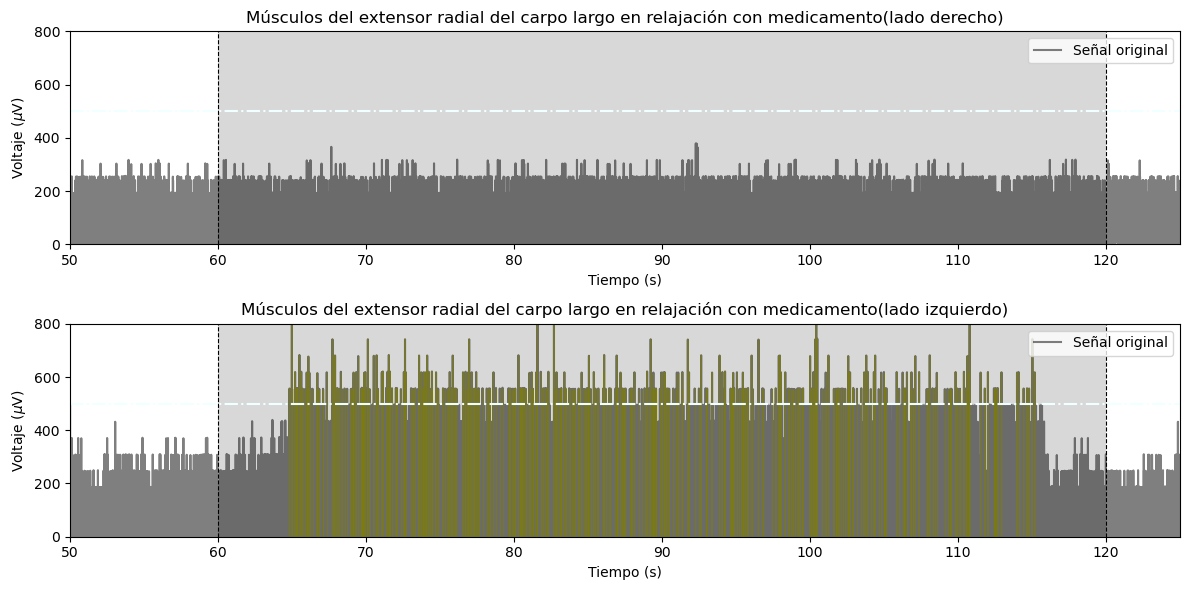

Tiempo de cambio de amplitud del canal 1: 0.0 segundos
Tiempo de cambio de amplitud del canal 2: 0.10650005133780382 segundos
Área bajo la curva de contracción del canal 1: 0.0
Área bajo la curva de contracción del canal 2: 43.9227


In [29]:
# Obtener los valores absolutos positivos de cada canal
abs_channel1 = np.abs(channel1)
abs_channel2 = np.abs(channel2)

# Aplicar umbral a los canales
abs_channel1[abs_channel1 <= threshold1] = 0
abs_channel2[abs_channel2 <= threshold2] = 0

# Calcular el tiempo de cambio de amplitud de los valores absolutos positivos
diff1 = np.diff(abs_channel1)
time_diff1 = np.diff(time[start_index:end_index])
cambio_amplitud_index1 = np.where(diff1 != 0)[0]
tiempo_cambio_amplitud1 = np.sum(time_diff1[cambio_amplitud_index1])

diff2 = np.diff(abs_channel2)
time_diff2 = np.diff(time[start_index:end_index])
cambio_amplitud_index2 = np.where(diff2 != 0)[0]
tiempo_cambio_amplitud2 = np.sum(time_diff2[cambio_amplitud_index2])

# Calcular el área bajo la curva de contracción de los valores absolutos positivos
contraction_area1 = np.trapz(abs_channel1, dx=1/sample_rate)
contraction_area2 = np.trapz(abs_channel2, dx=1/sample_rate)

# Graficar la señal con valores absolutos positivos
plt.figure(figsize=(12, 6))

# Canal 1
plt.subplot(211)
plt.axvspan(start_time, end_time, facecolor='gray', alpha=0.3)
plt.plot(time, np.abs(signal[:, 0]), color='black', label='Señal original', alpha=0.5)
plt.axvline(start_time, color='black', linestyle='--', linewidth=0.8)
plt.axvline(end_time, color='black', linestyle='--', linewidth=0.8)
plt.fill_between(time[start_index:end_index], 0, abs_channel1, where=abs_channel1 > 0, color='yellow', alpha=0.5)
plt.axhline(y=threshold1, color='azure', linestyle='-.')
plt.xlim(50,125)
plt.ylim(0,800)
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje ($\mu$V)')
plt.title('Músculos del extensor radial del carpo largo en relajación con medicamento(lado derecho)')
# Crear la leyenda con una ubicación específica
plt.legend(loc='upper right')

# Canal 2
plt.subplot(212)
plt.axvspan(start_time, end_time, facecolor='gray', alpha=0.3)
plt.plot(time, np.abs(signal[:, 1]), color='black', label='Señal original', alpha=0.5)
plt.axvline(start_time, color='black', linestyle='--', linewidth=0.8)
plt.axvline(end_time, color='black', linestyle='--', linewidth=0.8)
plt.fill_between(time[start_index:end_index], 0, abs_channel2, where=abs_channel2 > 0, color='yellow', alpha=0.5)
plt.axhline(y=threshold2, color='azure', linestyle='-.')
plt.xlim(50,125)
plt.ylim(0,800)
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje ($\mu$V)')
plt.title('Músculos del extensor radial del carpo largo en relajación con medicamento(lado izquierdo)')
# Crear la leyenda con una ubicación específica
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Imprimir resultados
print("Tiempo de cambio de amplitud del canal 1:", tiempo_cambio_amplitud1, "segundos")
print("Tiempo de cambio de amplitud del canal 2:", tiempo_cambio_amplitud2, "segundos")
print("Área bajo la curva de contracción del canal 1:", contraction_area1)
print("Área bajo la curva de contracción del canal 2:", contraction_area2)

<a id='3'></a>
##  Análisis del registro EMG con filtro mediano

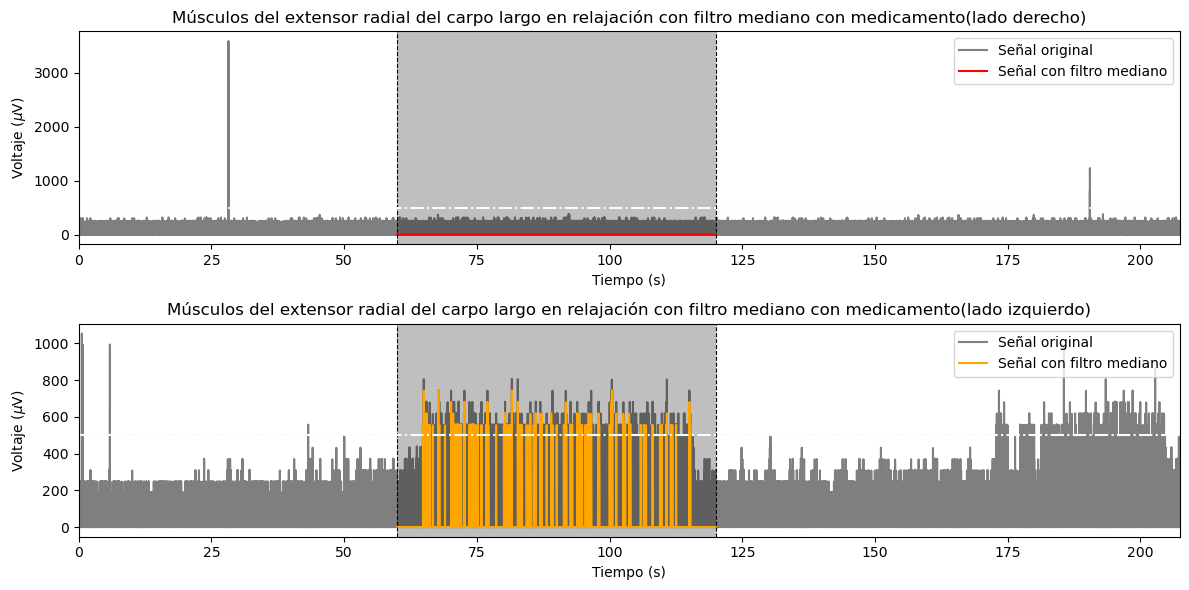

Tiempo de cambio de amplitud del canal 1: 0.0 segundos
Tiempo de cambio de amplitud del canal 2: 0.03230001557008677 segundos
Área bajo la curva de contracción del canal 1: 0.0
Área bajo la curva de contracción del canal 2: 23.9635


In [30]:
# Parámetros de ajuste
kernel_size = 5  # Tamaño del kernel del filtro mediano

# Aplicar filtro mediano a cada canal
filtered_channel1 = medfilt(channel1, kernel_size)
filtered_channel2 = medfilt(channel2, kernel_size)

# Obtener los valores absolutos positivos de cada canal filtrado
abs_filtered_channel1 = np.abs(filtered_channel1)
abs_filtered_channel2 = np.abs(filtered_channel2)

# Aplicar umbral a los canales filtrados
abs_filtered_channel1[abs_filtered_channel1 <= threshold1] = 0
abs_filtered_channel2[abs_filtered_channel2 <= threshold2] = 0

# Calcular el tiempo de cambio de amplitud de los valores absolutos positivos
diff1 = np.diff(abs_filtered_channel1)
time_diff1 = np.diff(time[start_index:end_index])
cambio_amplitud_index1 = np.where(diff1 != 0)[0]
tiempo_cambio_amplitud1 = np.sum(time_diff1[cambio_amplitud_index1])

diff2 = np.diff(abs_filtered_channel2)
time_diff2 = np.diff(time[start_index:end_index])
cambio_amplitud_index2 = np.where(diff2 != 0)[0]
tiempo_cambio_amplitud2 = np.sum(time_diff2[cambio_amplitud_index2])

# Calcular el área bajo la curva de contracción de los valores absolutos positivos
contraction_area1 = np.trapz(abs_filtered_channel1, dx=1/sample_rate)
contraction_area2 = np.trapz(abs_filtered_channel2, dx=1/sample_rate)

# Graficar la señal original y la señal filtrada con valores absolutos positivos
plt.figure(figsize=(12, 6))

# Canal 1
plt.subplot(211)
plt.axvspan(start_time, end_time, facecolor='gray', alpha=0.5)
plt.plot(time, np.abs(signal[:, 0]), color='black', label='Señal original', alpha=0.5)
plt.plot(time[start_index:end_index], abs_filtered_channel1, color='red', label='Señal con filtro mediano')
plt.axvline(start_time, color='black', linestyle='--', linewidth=0.8)
plt.axvline(end_time, color='black', linestyle='--', linewidth=0.8)
plt.fill_between(time[start_index:end_index], 0, abs_filtered_channel1, where=abs_filtered_channel1 > 0, color='yellow', alpha=0.5)
plt.axhline(y=threshold1, color='azure', linestyle='-.')
plt.xlim(0,max(time))
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje ($\mu$V)')
plt.title('Músculos del extensor radial del carpo largo en relajación con filtro mediano con medicamento(lado derecho)')
# Crear la leyenda con una ubicación específica
plt.legend(loc='upper right')

# Canal 2
plt.subplot(212)
plt.axvspan(start_time, end_time, facecolor='gray', alpha=0.5)
plt.plot(time, np.abs(signal[:, 1]), color='black', label='Señal original', alpha=0.5)
plt.plot(time[start_index:end_index], abs_filtered_channel2, color='orange', label='Señal con filtro mediano')
plt.axvline(start_time, color='black', linestyle='--', linewidth=0.8)
plt.axvline(end_time, color='black', linestyle='--', linewidth=0.8)
plt.fill_between(time[start_index:end_index], 0, abs_filtered_channel2, where=abs_filtered_channel2 > 0, color='yellow', alpha=0.5)
plt.axhline(y=threshold2, color='azure', linestyle='-.')
plt.xlim(0,max(time))
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje ($\mu$V)')
plt.title('Músculos del extensor radial del carpo largo en relajación con filtro mediano con medicamento(lado izquierdo)')
# Crear la leyenda con una ubicación específica
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Imprimir resultados
print("Tiempo de cambio de amplitud del canal 1:", tiempo_cambio_amplitud1, "segundos")
print("Tiempo de cambio de amplitud del canal 2:", tiempo_cambio_amplitud2, "segundos")
print("Área bajo la curva de contracción del canal 1:", contraction_area1)
print("Área bajo la curva de contracción del canal 2:", contraction_area2)

#### Ampliación de la ventana de visualización

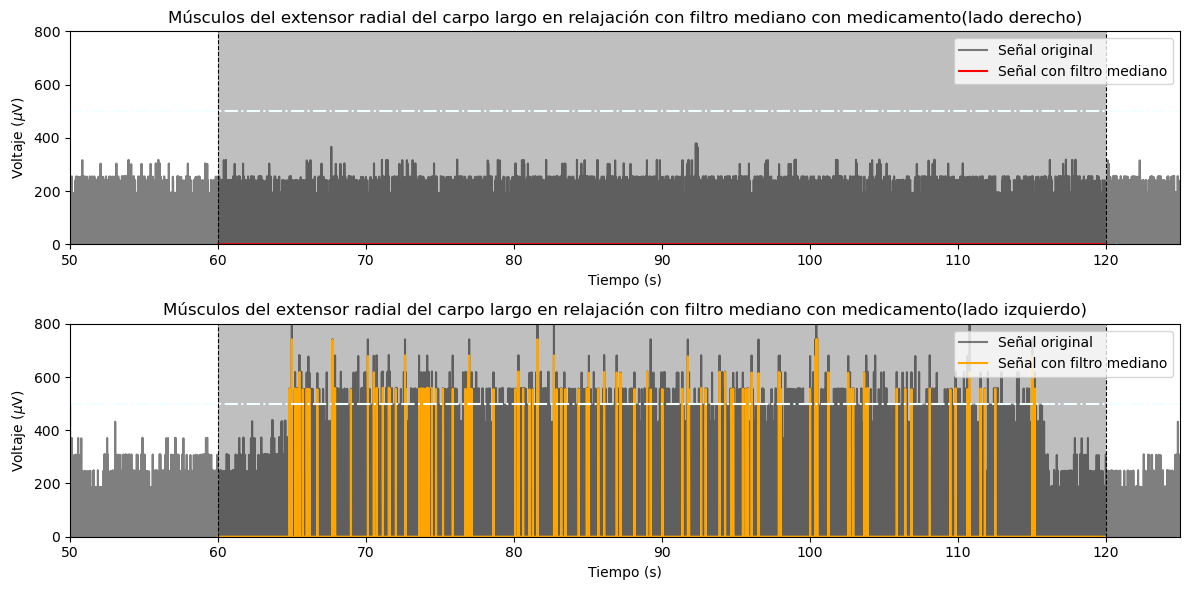

Tiempo de cambio de amplitud del canal 1: 0.0 segundos
Tiempo de cambio de amplitud del canal 2: 0.03230001557008677 segundos
Área bajo la curva de contracción del canal 1: 0.0
Área bajo la curva de contracción del canal 2: 23.9635


In [31]:
# Parámetros de ajuste
kernel_size = 5  # Tamaño del kernel del filtro mediano

# Aplicar filtro mediano a cada canal
filtered_channel1 = medfilt(channel1, kernel_size)
filtered_channel2 = medfilt(channel2, kernel_size)

# Obtener los valores absolutos positivos de cada canal filtrado
abs_filtered_channel1 = np.abs(filtered_channel1)
abs_filtered_channel2 = np.abs(filtered_channel2)

# Aplicar umbral a los canales filtrados
abs_filtered_channel1[abs_filtered_channel1 <= threshold1] = 0
abs_filtered_channel2[abs_filtered_channel2 <= threshold2] = 0

# Calcular el tiempo de cambio de amplitud de los valores absolutos positivos
diff1 = np.diff(abs_filtered_channel1)
time_diff1 = np.diff(time[start_index:end_index])
cambio_amplitud_index1 = np.where(diff1 != 0)[0]
tiempo_cambio_amplitud1 = np.sum(time_diff1[cambio_amplitud_index1])

diff2 = np.diff(abs_filtered_channel2)
time_diff2 = np.diff(time[start_index:end_index])
cambio_amplitud_index2 = np.where(diff2 != 0)[0]
tiempo_cambio_amplitud2 = np.sum(time_diff2[cambio_amplitud_index2])

# Calcular el área bajo la curva de contracción de los valores absolutos positivos
contraction_area1 = np.trapz(abs_filtered_channel1, dx=1/sample_rate)
contraction_area2 = np.trapz(abs_filtered_channel2, dx=1/sample_rate)

# Graficar la señal original y la señal filtrada con valores absolutos positivos
plt.figure(figsize=(12, 6))

# Canal 1
plt.subplot(211)
plt.axvspan(start_time, end_time, facecolor='gray', alpha=0.5)
plt.plot(time, np.abs(signal[:, 0]), color='black', label='Señal original', alpha=0.5)
plt.plot(time[start_index:end_index], abs_filtered_channel1, color='red', label='Señal con filtro mediano')
plt.axvline(start_time, color='black', linestyle='--', linewidth=0.8)
plt.axvline(end_time, color='black', linestyle='--', linewidth=0.8)
plt.fill_between(time[start_index:end_index], 0, abs_filtered_channel1, where=abs_filtered_channel1 > 0, color='yellow', alpha=0.5)
plt.axhline(y=threshold1, color='azure', linestyle='-.')
plt.xlim(50,125)
plt.ylim(0,800)
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje ($\mu$V)')
plt.title('Músculos del extensor radial del carpo largo en relajación con filtro mediano con medicamento(lado derecho)')
# Crear la leyenda con una ubicación específica
plt.legend(loc='upper right')

# Canal 2
plt.subplot(212)
plt.axvspan(start_time, end_time, facecolor='gray', alpha=0.5)
plt.plot(time, np.abs(signal[:, 1]), color='black', label='Señal original', alpha=0.5)
plt.plot(time[start_index:end_index], abs_filtered_channel2, color='orange', label='Señal con filtro mediano')
plt.axvline(start_time, color='black', linestyle='--', linewidth=0.8)
plt.axvline(end_time, color='black', linestyle='--', linewidth=0.8)
plt.fill_between(time[start_index:end_index], 0, abs_filtered_channel2, where=abs_filtered_channel2 > 0, color='yellow', alpha=0.5)
plt.axhline(y=threshold2, color='azure', linestyle='-.')
plt.xlim(50,125)
plt.ylim(0,800)
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje ($\mu$V)')
plt.title('Músculos del extensor radial del carpo largo en relajación con filtro mediano con medicamento(lado izquierdo)')
# Crear la leyenda con una ubicación específica
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Imprimir resultados
print("Tiempo de cambio de amplitud del canal 1:", tiempo_cambio_amplitud1, "segundos")
print("Tiempo de cambio de amplitud del canal 2:", tiempo_cambio_amplitud2, "segundos")
print("Área bajo la curva de contracción del canal 1:", contraction_area1)
print("Área bajo la curva de contracción del canal 2:", contraction_area2)

<a id='4'></a>
##  Análisis del registro EMG con filtro Butterworth

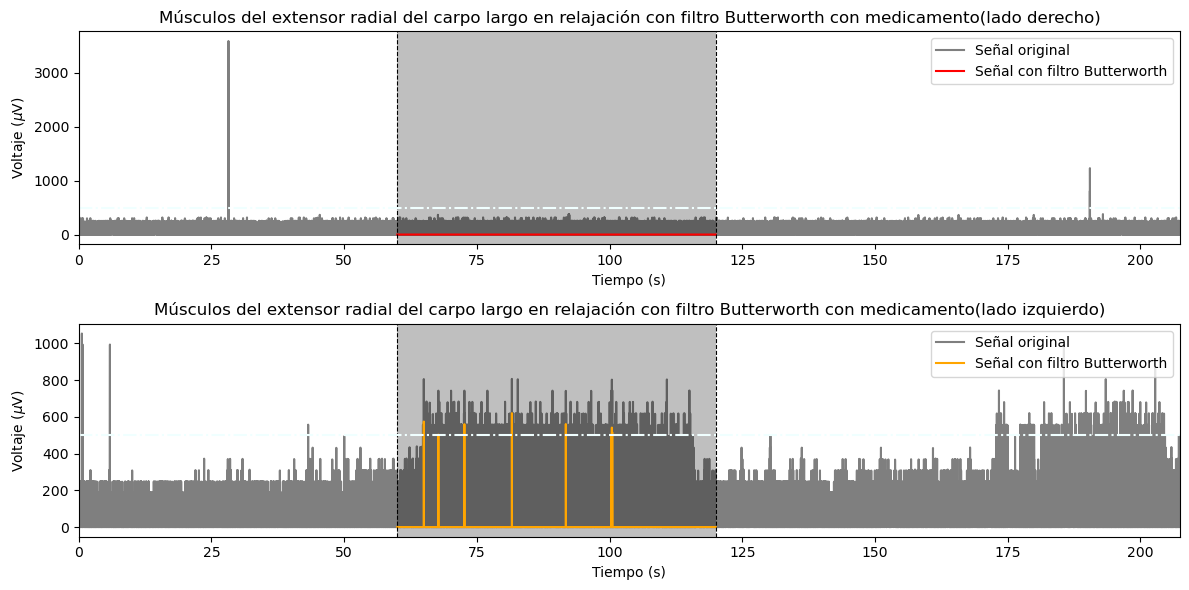

Tiempo de cambio de amplitud del canal 1: 0.0 segundos
Tiempo de cambio de amplitud del canal 2: 0.004600002217415522 segundos
Área bajo la curva de contracción del canal 1: 0.0
Área bajo la curva de contracción del canal 2: 2.050707023136903


In [32]:
# Parámetros de ajuste
lowcut = 10  # Frecuencia de corte inferior en Hz
highcut = 400  # Frecuencia de corte superior en Hz
order = 4  # Orden del filtro Butterworth

# Aplicar filtro Butterworth a cada canal
nyquist = 0.5 * sample_rate
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(order, [low, high], btype='band')
filtered_channel1 = filtfilt(b, a, channel1)
filtered_channel2 = filtfilt(b, a, channel2)

# Obtener los valores absolutos positivos de cada canal filtrado
abs_filtered_channel1 = np.abs(filtered_channel1)
abs_filtered_channel2 = np.abs(filtered_channel2)

# Aplicar umbral a los canales filtrados
abs_filtered_channel1[abs_filtered_channel1 <= threshold1] = 0
abs_filtered_channel2[abs_filtered_channel2 <= threshold2] = 0

# Calcular el tiempo de cambio de amplitud de los valores absolutos positivos
diff1 = np.diff(abs_filtered_channel1)
time_diff1 = np.diff(time[start_index:end_index])
cambio_amplitud_index1 = np.where(diff1 != 0)[0]
tiempo_cambio_amplitud1 = np.sum(time_diff1[cambio_amplitud_index1])

diff2 = np.diff(abs_filtered_channel2)
time_diff2 = np.diff(time[start_index:end_index])
cambio_amplitud_index2 = np.where(diff2 != 0)[0]
tiempo_cambio_amplitud2 = np.sum(time_diff2[cambio_amplitud_index2])

# Calcular el área bajo la curva de contracción de los valores absolutos positivos
contraction_area1 = np.trapz(abs_filtered_channel1, dx=1/sample_rate)
contraction_area2 = np.trapz(abs_filtered_channel2, dx=1/sample_rate)

# Graficar la señal original y la señal filtrada con valores absolutos positivos
plt.figure(figsize=(12, 6))

# Canal 1
plt.subplot(211)
plt.axvspan(start_time, end_time, facecolor='gray', alpha=0.5)
plt.plot(time, np.abs(signal[:, 0]), color='black', label='Señal original', alpha=0.5)
plt.plot(time[start_index:end_index], abs_filtered_channel1, color='red', label='Señal con filtro Butterworth')
plt.axvline(start_time, color='black', linestyle='--', linewidth=0.8)
plt.axvline(end_time, color='black', linestyle='--', linewidth=0.8)
plt.fill_between(time[start_index:end_index], 0, abs_filtered_channel1, where=abs_filtered_channel1 > 0, color='yellow', alpha=0.5)
plt.axhline(y=threshold1, color='azure', linestyle='-.')
plt.xlim(0,max(time))
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje ($\mu$V)')
plt.title('Músculos del extensor radial del carpo largo en relajación con filtro Butterworth con medicamento(lado derecho)')
# Crear la leyenda con una ubicación específica
plt.legend(loc='upper right')

# Canal 2
plt.subplot(212)
plt.axvspan(start_time, end_time, facecolor='gray', alpha=0.5)
plt.plot(time, np.abs(signal[:, 1]), color='black', label='Señal original', alpha=0.5)
plt.plot(time[start_index:end_index], abs_filtered_channel2, color='orange', label='Señal con filtro Butterworth')
plt.axvline(start_time, color='black', linestyle='--', linewidth=0.8)
plt.axvline(end_time, color='black', linestyle='--', linewidth=0.8)
plt.fill_between(time[start_index:end_index], 0, abs_filtered_channel2, where=abs_filtered_channel2 > 0, color='yellow', alpha=0.5)
plt.axhline(y=threshold2, color='azure', linestyle='-.')
plt.xlim(0,max(time))
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje ($\mu$V)')
plt.title('Músculos del extensor radial del carpo largo en relajación con filtro Butterworth con medicamento(lado izquierdo)')
# Crear la leyenda con una ubicación específica
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Imprimir resultados
print("Tiempo de cambio de amplitud del canal 1:", tiempo_cambio_amplitud1, "segundos")
print("Tiempo de cambio de amplitud del canal 2:", tiempo_cambio_amplitud2, "segundos")
print("Área bajo la curva de contracción del canal 1:", contraction_area1)
print("Área bajo la curva de contracción del canal 2:", contraction_area2)

#### Ampliación de la ventana de visualización

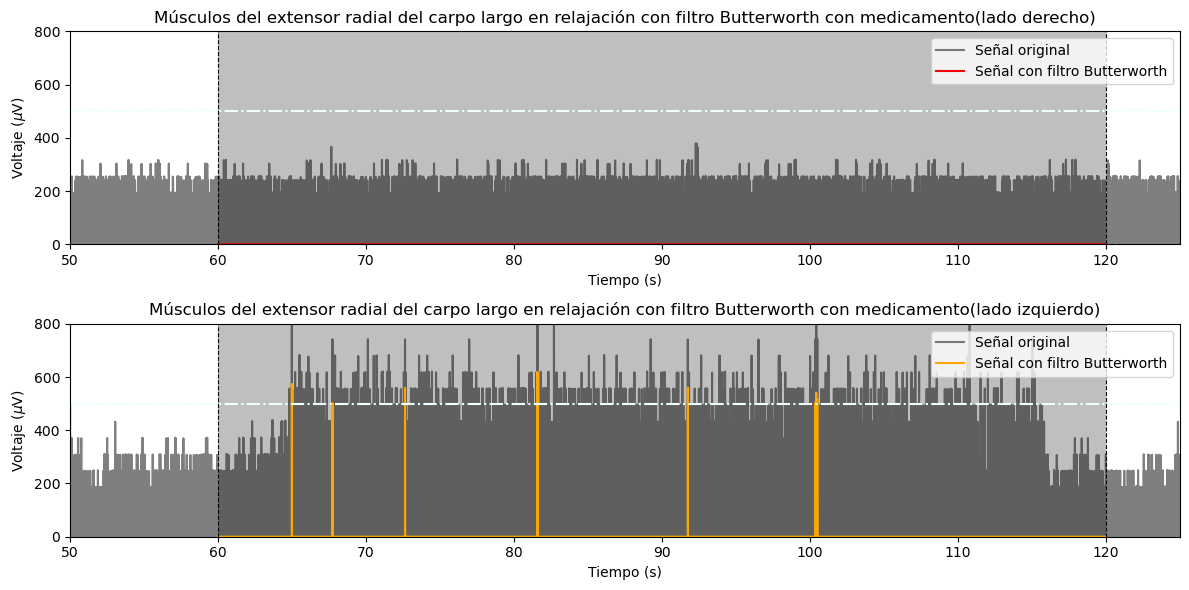

Tiempo de cambio de amplitud del canal 1: 0.0 segundos
Tiempo de cambio de amplitud del canal 2: 0.004600002217415522 segundos
Área bajo la curva de contracción del canal 1: 0.0
Área bajo la curva de contracción del canal 2: 2.050707023136903


In [33]:
# Parámetros de ajuste
lowcut = 10  # Frecuencia de corte inferior en Hz
highcut = 400  # Frecuencia de corte superior en Hz
order = 4  # Orden del filtro Butterworth

# Aplicar filtro Butterworth a cada canal
nyquist = 0.5 * sample_rate
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(order, [low, high], btype='band')
filtered_channel1 = filtfilt(b, a, channel1)
filtered_channel2 = filtfilt(b, a, channel2)

# Obtener los valores absolutos positivos de cada canal filtrado
abs_filtered_channel1 = np.abs(filtered_channel1)
abs_filtered_channel2 = np.abs(filtered_channel2)

# Aplicar umbral a los canales filtrados
abs_filtered_channel1[abs_filtered_channel1 <= threshold1] = 0
abs_filtered_channel2[abs_filtered_channel2 <= threshold2] = 0

# Calcular el tiempo de cambio de amplitud de los valores absolutos positivos
diff1 = np.diff(abs_filtered_channel1)
time_diff1 = np.diff(time[start_index:end_index])
cambio_amplitud_index1 = np.where(diff1 != 0)[0]
tiempo_cambio_amplitud1 = np.sum(time_diff1[cambio_amplitud_index1])

diff2 = np.diff(abs_filtered_channel2)
time_diff2 = np.diff(time[start_index:end_index])
cambio_amplitud_index2 = np.where(diff2 != 0)[0]
tiempo_cambio_amplitud2 = np.sum(time_diff2[cambio_amplitud_index2])

# Calcular el área bajo la curva de contracción de los valores absolutos positivos
contraction_area1 = np.trapz(abs_filtered_channel1, dx=1/sample_rate)
contraction_area2 = np.trapz(abs_filtered_channel2, dx=1/sample_rate)

# Graficar la señal original y la señal filtrada con valores absolutos positivos
plt.figure(figsize=(12, 6))

# Canal 1
plt.subplot(211)
plt.axvspan(start_time, end_time, facecolor='gray', alpha=0.5)
plt.plot(time, np.abs(signal[:, 0]), color='black', label='Señal original', alpha=0.5)
plt.plot(time[start_index:end_index], abs_filtered_channel1, color='red', label='Señal con filtro Butterworth')
plt.axvline(start_time, color='black', linestyle='--', linewidth=0.8)
plt.axvline(end_time, color='black', linestyle='--', linewidth=0.8)
plt.fill_between(time[start_index:end_index], 0, abs_filtered_channel1, where=abs_filtered_channel1 > 0, color='yellow', alpha=0.5)
plt.axhline(y=threshold1, color='azure', linestyle='-.')
plt.xlim(50,125)
plt.ylim(0,800)
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje ($\mu$V)')
plt.title('Músculos del extensor radial del carpo largo en relajación con filtro Butterworth con medicamento(lado derecho)')
# Crear la leyenda con una ubicación específica
plt.legend(loc='upper right')

# Canal 2
plt.subplot(212)
plt.axvspan(start_time, end_time, facecolor='gray', alpha=0.5)
plt.plot(time, np.abs(signal[:, 1]), color='black', label='Señal original', alpha=0.5)
plt.plot(time[start_index:end_index], abs_filtered_channel2, color='orange', label='Señal con filtro Butterworth')
plt.axvline(start_time, color='black', linestyle='--', linewidth=0.8)
plt.axvline(end_time, color='black', linestyle='--', linewidth=0.8)
plt.fill_between(time[start_index:end_index], 0, abs_filtered_channel2, where=abs_filtered_channel2 > 0, color='yellow', alpha=0.5)
plt.axhline(y=threshold2, color='azure', linestyle='-.')
plt.xlim(50,125)
plt.ylim(0,800)
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje ($\mu$V)')
plt.title('Músculos del extensor radial del carpo largo en relajación con filtro Butterworth con medicamento(lado izquierdo)')
# Crear la leyenda con una ubicación específica
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Imprimir resultados
print("Tiempo de cambio de amplitud del canal 1:", tiempo_cambio_amplitud1, "segundos")
print("Tiempo de cambio de amplitud del canal 2:", tiempo_cambio_amplitud2, "segundos")
print("Área bajo la curva de contracción del canal 1:", contraction_area1)
print("Área bajo la curva de contracción del canal 2:", contraction_area2)

<a id='5'></a>
##  Análisis del registro EMG con filtro Savitzky-Golay

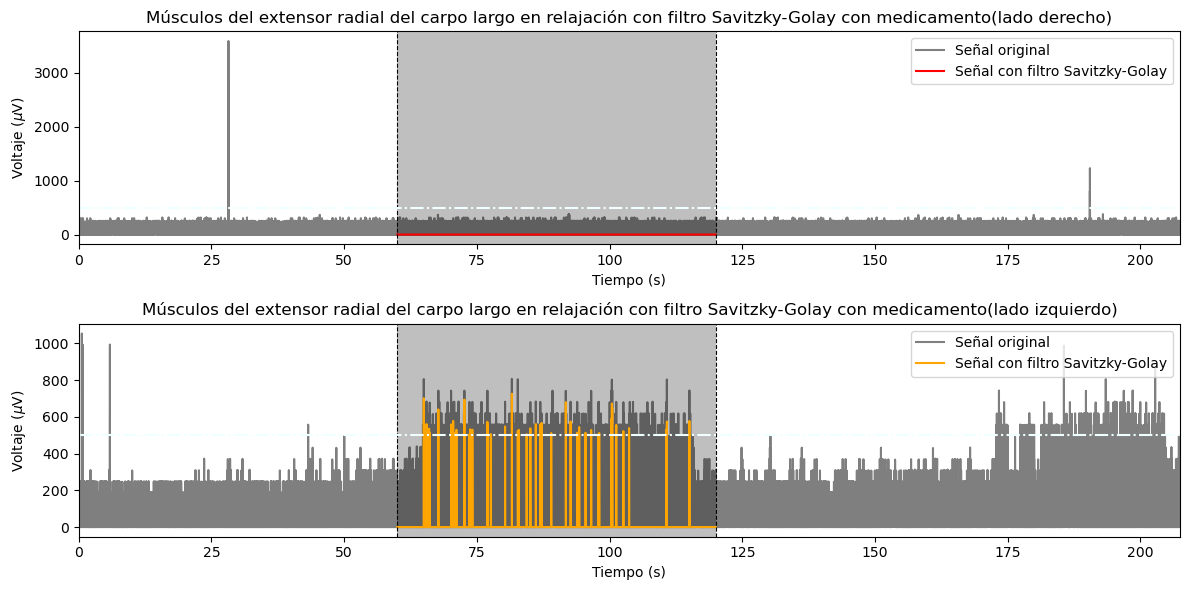

Tiempo de cambio de amplitud del canal 1: 0.0 segundos
Tiempo de cambio de amplitud del canal 2: 0.023100011135184673 segundos
Área bajo la curva de contracción del canal 1: 0.0
Área bajo la curva de contracción del canal 2: 10.289198463550031


In [34]:
# Aplicar filtro Savitzky-Golay de segundo orden a cada canal
filtered_channel1 = savgol_filter(channel1, window_length=21, polyorder=2)
filtered_channel2 = savgol_filter(channel2, window_length=21, polyorder=2)

# Obtener los valores absolutos positivos de cada canal filtrado
abs_filtered_channel1 = np.abs(filtered_channel1)
abs_filtered_channel2 = np.abs(filtered_channel2)

# Aplicar umbral a los canales filtrados
abs_filtered_channel1[abs_filtered_channel1 <= threshold1] = 0
abs_filtered_channel2[abs_filtered_channel2 <= threshold2] = 0

# Calcular el tiempo de cambio de amplitud de los valores absolutos positivos
diff1 = np.diff(abs_filtered_channel1)
time_diff1 = np.diff(time[start_index:end_index])
cambio_amplitud_index1 = np.where(diff1 != 0)[0]
tiempo_cambio_amplitud1 = np.sum(time_diff1[cambio_amplitud_index1])

diff2 = np.diff(abs_filtered_channel2)
time_diff2 = np.diff(time[start_index:end_index])
cambio_amplitud_index2 = np.where(diff2 != 0)[0]
tiempo_cambio_amplitud2 = np.sum(time_diff2[cambio_amplitud_index2])

# Calcular el área bajo la curva de contracción de los valores absolutos positivos
contraction_area1 = np.trapz(abs_filtered_channel1, dx=1/sample_rate)
contraction_area2 = np.trapz(abs_filtered_channel2, dx=1/sample_rate)

# Graficar la señal original y la señal filtrada con valores absolutos positivos
plt.figure(figsize=(12, 6))

# Canal 1
plt.subplot(211)
plt.axvspan(start_time, end_time, facecolor='gray', alpha=0.5)
plt.plot(time, np.abs(signal[:, 0]), color='black', label='Señal original', alpha=0.5)
plt.plot(time[start_index:end_index], abs_filtered_channel1, color='red', label='Señal con filtro Savitzky-Golay')
plt.axvline(start_time, color='black', linestyle='--', linewidth=0.8)
plt.axvline(end_time, color='black', linestyle='--', linewidth=0.8)
plt.fill_between(time[start_index:end_index], 0, abs_filtered_channel1, where=abs_filtered_channel1 > 0, color='yellow', alpha=0.5)
plt.axhline(y=threshold1, color='azure', linestyle='-.')
plt.xlim(0,max(time))
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje ($\mu$V)')
plt.title('Músculos del extensor radial del carpo largo en relajación con filtro Savitzky-Golay con medicamento(lado derecho)')
# Crear la leyenda con una ubicación específica
plt.legend(loc='upper right')

# Canal 2
plt.subplot(212)
plt.axvspan(start_time, end_time, facecolor='gray', alpha=0.5)
plt.plot(time, np.abs(signal[:, 1]), color='black', label='Señal original', alpha=0.5)
plt.plot(time[start_index:end_index], abs_filtered_channel2, color='orange', label='Señal con filtro Savitzky-Golay')
plt.axvline(start_time, color='black', linestyle='--', linewidth=0.8)
plt.axvline(end_time, color='black', linestyle='--', linewidth=0.8)
plt.fill_between(time[start_index:end_index], 0, abs_filtered_channel2, where=abs_filtered_channel2 > 0, color='yellow', alpha=0.5)
plt.axhline(y=threshold2, color='azure', linestyle='-.')
plt.xlim(0,max(time))
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje ($\mu$V)')
plt.title('Músculos del extensor radial del carpo largo en relajación con filtro Savitzky-Golay con medicamento(lado izquierdo)')
# Crear la leyenda con una ubicación específica
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Imprimir resultados
print("Tiempo de cambio de amplitud del canal 1:", tiempo_cambio_amplitud1, "segundos")
print("Tiempo de cambio de amplitud del canal 2:", tiempo_cambio_amplitud2, "segundos")
print("Área bajo la curva de contracción del canal 1:", contraction_area1)
print("Área bajo la curva de contracción del canal 2:", contraction_area2)

#### Ampliación de la ventana de visualización

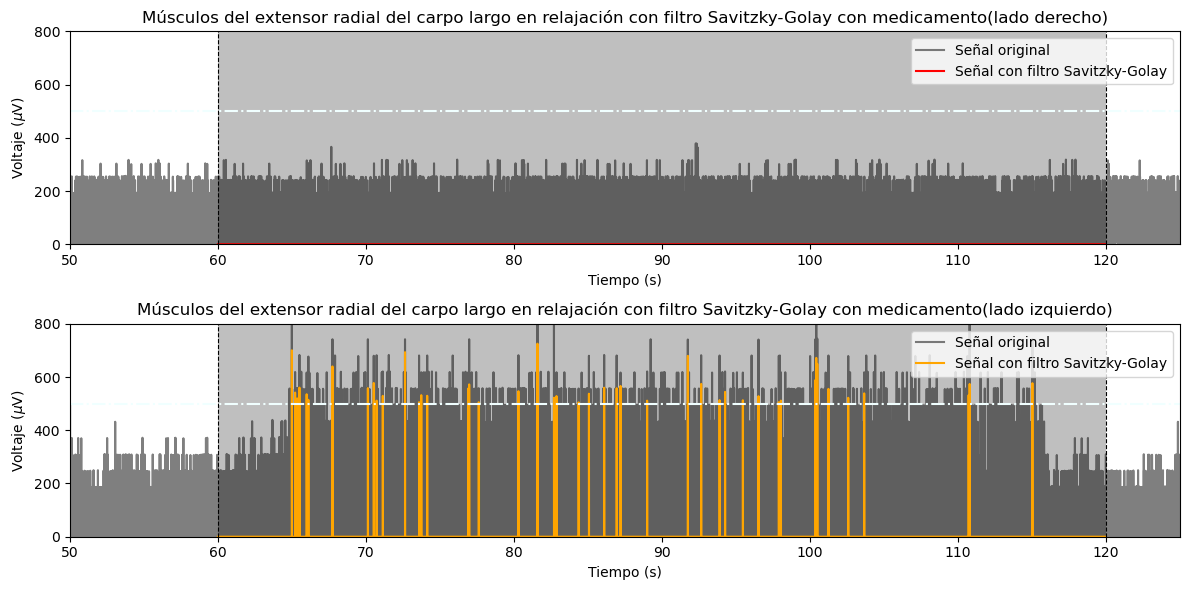

Tiempo de cambio de amplitud del canal 1: 0.0 segundos
Tiempo de cambio de amplitud del canal 2: 0.023100011135184673 segundos
Área bajo la curva de contracción del canal 1: 0.0
Área bajo la curva de contracción del canal 2: 10.289198463550031


In [35]:
# Aplicar filtro Savitzky-Golay de segundo orden a cada canal
filtered_channel1 = savgol_filter(channel1, window_length=21, polyorder=2)
filtered_channel2 = savgol_filter(channel2, window_length=21, polyorder=2)

# Obtener los valores absolutos positivos de cada canal filtrado
abs_filtered_channel1 = np.abs(filtered_channel1)
abs_filtered_channel2 = np.abs(filtered_channel2)

# Aplicar umbral a los canales filtrados
abs_filtered_channel1[abs_filtered_channel1 <= threshold1] = 0
abs_filtered_channel2[abs_filtered_channel2 <= threshold2] = 0

# Calcular el tiempo de cambio de amplitud de los valores absolutos positivos
diff1 = np.diff(abs_filtered_channel1)
time_diff1 = np.diff(time[start_index:end_index])
cambio_amplitud_index1 = np.where(diff1 != 0)[0]
tiempo_cambio_amplitud1 = np.sum(time_diff1[cambio_amplitud_index1])

diff2 = np.diff(abs_filtered_channel2)
time_diff2 = np.diff(time[start_index:end_index])
cambio_amplitud_index2 = np.where(diff2 != 0)[0]
tiempo_cambio_amplitud2 = np.sum(time_diff2[cambio_amplitud_index2])

# Calcular el área bajo la curva de contracción de los valores absolutos positivos
contraction_area1 = np.trapz(abs_filtered_channel1, dx=1/sample_rate)
contraction_area2 = np.trapz(abs_filtered_channel2, dx=1/sample_rate)

# Graficar la señal original y la señal filtrada con valores absolutos positivos
plt.figure(figsize=(12, 6))

# Canal 1
plt.subplot(211)
plt.axvspan(start_time, end_time, facecolor='gray', alpha=0.5)
plt.plot(time, np.abs(signal[:, 0]), color='black', label='Señal original', alpha=0.5)
plt.plot(time[start_index:end_index], abs_filtered_channel1, color='red', label='Señal con filtro Savitzky-Golay')
plt.axvline(start_time, color='black', linestyle='--', linewidth=0.8)
plt.axvline(end_time, color='black', linestyle='--', linewidth=0.8)
plt.fill_between(time[start_index:end_index], 0, abs_filtered_channel1, where=abs_filtered_channel1 > 0, color='yellow', alpha=0.5)
plt.axhline(y=threshold1, color='azure', linestyle='-.')
plt.xlim(50,125)
plt.ylim(0,800)
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje ($\mu$V)')
plt.title('Músculos del extensor radial del carpo largo en relajación con filtro Savitzky-Golay con medicamento(lado derecho)')
# Crear la leyenda con una ubicación específica
plt.legend(loc='upper right')

# Canal 2
plt.subplot(212)
plt.axvspan(start_time, end_time, facecolor='gray', alpha=0.5)
plt.plot(time, np.abs(signal[:, 1]), color='black', label='Señal original', alpha=0.5)
plt.plot(time[start_index:end_index], abs_filtered_channel2, color='orange', label='Señal con filtro Savitzky-Golay')
plt.axvline(start_time, color='black', linestyle='--', linewidth=0.8)
plt.axvline(end_time, color='black', linestyle='--', linewidth=0.8)
plt.fill_between(time[start_index:end_index], 0, abs_filtered_channel2, where=abs_filtered_channel2 > 0, color='yellow', alpha=0.5)
plt.axhline(y=threshold2, color='azure', linestyle='-.')
plt.xlim(50,125)
plt.ylim(0,800)
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje ($\mu$V)')
plt.title('Músculos del extensor radial del carpo largo en relajación con filtro Savitzky-Golay con medicamento(lado izquierdo)')
# Crear la leyenda con una ubicación específica
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Imprimir resultados
print("Tiempo de cambio de amplitud del canal 1:", tiempo_cambio_amplitud1, "segundos")
print("Tiempo de cambio de amplitud del canal 2:", tiempo_cambio_amplitud2, "segundos")
print("Área bajo la curva de contracción del canal 1:", contraction_area1)
print("Área bajo la curva de contracción del canal 2:", contraction_area2)

Registros y Notebook elaborado por Alejandro Elliot Flores Oliva, licenciatura en Física Biomédica, Facultad de Ciencias, Universidad Autónoma de México (UNAM), correo: elliotflooli@ciencias.unam.mx